# Part 1 - Key Concepts in RL

## Key Concepts and Terminology

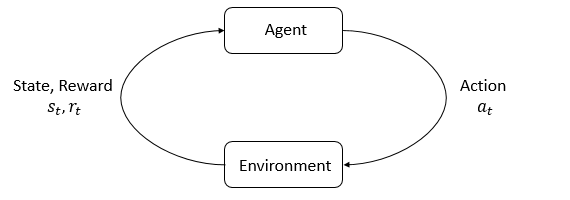

Environment is the world the agent lives in and interacts with. 

### Policies

A policy is used by an agent to decide what actions to take. If it is deterministic, it is denoted by $\mu$, if it is stochastic $\pi$





Parameterized Policies are the policies whose outputs are computable functions that depend on set of parameters that can be adjusted to change the behaviour via some optimization problem. 

### Deterministic Policies

A policy is similiar to a simple MLP

obs_tensor is the observations and actions are the actions to be taken by the agent after seeing the observations

In [2]:
pi_net = nn.Sequential(
            nn.Linear(obs_dim. 64),
            nn.Tanh(),
            nn.Linear(64, 64),
            nn.Tanh(),
            nn.Linear(64, act_dim)
        )

obs_tensor = torch.as_tensor(obs, dtype = torch.float32)
actions = pi_net(obs_tensor)

### Stochastic Policies

There are two kinds of stochastic policies in DRL, categorical policies and diagonal Gaussian Policies

Categorical Policies are used in discrete action spaces and Diagonal Gaussian Policies are used in continuous action spaces. 

Two computations are centrally important for using and training stochastic policies:

- Sampling actions from the policy
- Computing log likelihoods of particular actions $\log\pi_\theta(a|s)$

#### Categorical Policy

It is similar to a multiclass classification problem where the outputs are probabilities of each action. 

Sampling: Given the probabilities of each action, frameworks have their own built in tools for sampling. 

Log-Likelihood: Denoting the last layer of the policy as $P_\theta(s)$ which is a vector with however many entries as there are actions, so we can treat the actions as indices for the vector. Log Likelihood for an action a can then be obtained by indexing into the vector

$\log\pi_\theta(a|s) = \log[P_\theta(s)]_a$

#### Diagonal Gaussian Policies

A Diagonal Gaussian Distribution is a special case where the covariance matrix only has entries on the diagonal. As a result of this, it can be represented as a vector instead of a matrix. 

A diagonal gaussian policy always has a neural network that maps observations to mean actions $\mu_\theta(s)$. There are two different ways that a covariance matrix can be represented. 

One way is to represent a single vector of log standard deviations which is not a function of the state. Another way is to use a neural network that maps from states to log standard deviations.  

### Trajectories/Episodes

A trajectory, $\tau$ is a sequence of states and actions in the world. 



The first state of the world is sampled from another distribution called the start state distribution. 

State transitions are governed by the natural laws of the environment and depend only on the most recent action. 

If it is deterministic $s_{t+1} = f(s_t, a_t)$,
if it is stochastic $s_{t+1} \sim P(.|s_t, a_t)$

### Reward and Return 

The reward is critically important in reinforcement learning. It takes the current state of the world, action taken and the next state of the world. 

It is frequently simplified to take only the current state and action pair. 

The goal of the agent is to maximize some notion of reward accumulated over a trajectory/episode. This can have different meanings. 

One kind of return is finite-horizon undiscounted return which is the sum of reward obtained over a fixed window of steps. 

$R(\tau)=\Sigma^T_{t=0}r_t$

Another kind of return is the infinite-horizon discounted return which is the sum of all rewards ever obtained bny the agent but discounted by how far off in the future they are obtained. This discount factor is between 0 and 1. 

$R(\tau) = \Sigma_{t=0}^{\infty}\gamma^tr_t$

### The RL Problem

Irrespective of the type of return measure, the choice of policy, the goal in RL is to set a policy that maximizes the expected return when an agent acts according to it. 

If we assume that both the transitions and the policy are stochastic,the probability of a T-step trajectory is

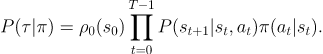

The expected return denoted by $J(\pi)$ is

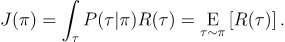

The central optimization problem in RL can be expressed as 



with $\pi^*$ being the optimal policy

#### Value Functions

The value of a state is the return obtained by following the policy in that state. There are four main functions to be noted. 

- On Policy Value Functions, $V^\pi(s)$:

Expected return when you start in state s and always act according to policy $\pi$



- On Policy Action-Value Functions, $Q^\pi(s, a)$:

Expected return when you start in state s, take arbitrary action a ( which doesnt necessarily have to be from the policy) and then forever act according to policy $\pi$



- Optimal Value Function, $v^*(s)$: 

Expected Return if you start in state s and always act according to the optimal policy in the environment



- Optimal Action-Value Function, $Q^*(a, a)$:

Expected Return if you start in state s, take an arbitrary action a and then forever act according to the optimal policy in the environment. 



#### The Optimal Q-Function and the Optimal Action

The optimal action can be obtained by using picking the action that gives the maximum reward from the optimal action-value function. 



#### Bellman Equations

The basic idea behind bellman equation is that the value of your starting point, is the reward you expect to get from being there plus the value of wherever you land next. 

The Bellman Equation for on-policy value function is

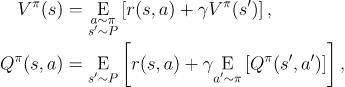

where $s'\sim P$ is shorthand for $s' \sim P(.|s,a)$ indicating that the next state s' is sampled from the environment's transition rules and $a \sim \pi$ is shorthand for $a \sim \pi(.|s)$ and $a'\sim\pi$ is shorthand for $a'\sim\pi(.|s)$ 

The Bellman Equations for the Optimal value Functions are 

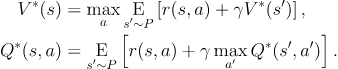

The main difference between Bellman Equations for the on-policy value functions and the optimal value functions is the presence of max over actions. It's inclusion reflects the fact that agent picks the optimal action in order to get the highest value. 

The term Bellman Backup is the right hand side of the bellman equation for a staet/state-action pair ie., the reward plus the next value. 

#### Advantage Functions

Sometimes, we don't need a measure of how good an action is, but we would need how much better it is than the others on an average. The advantage function tells the relative advantage of that action. 

The Advantage Function $A^\pi(s, a)$ corresponding to a policy $\pi$ describes how much better it is to take a specific action a in state s over randomly selecting an action according to $\pi(.|s)$ assuming you act according to $\pi$ forever after. Mathematically it is represented as



This function is used in the Policy Gradient Methods

#### Formalism

Markov Decision Process is a 5 tuple where

S is the set of all valid states,

A is the set of all valid actions,

R : S $\times$ A $\times$ S $\to$ $\mathbb{R}$ is the reward function, with r_t = R(s_t, a_t, s_{t+1}),

P : S $\times$ A $\to$ $\mathcal{P}(S)$ is the transition probability function, with P(s'|s,a) being the probability of transitioning into state s' if you start in state s and take action a,

and $\rho_0$ is the starting state distribution.


# Part 2 - Kinds of RL Algorithms

